In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### set up test case

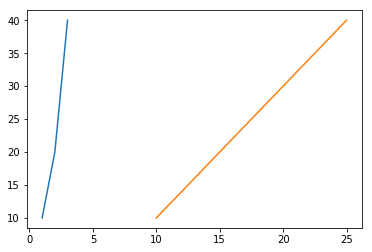

In [310]:
# two random features
test_X = pd.DataFrame([
    [1, 2, 3,],
    [10, 15, 25,]
]).transpose()

test_theta = [5, 10, 1]

test_y = pd.Series([10, 20, 40])

plt.plot(test_X[0], test_y)
plt.plot(test_X[1], test_y)

### feature normalization
subtract by mean and divide by std

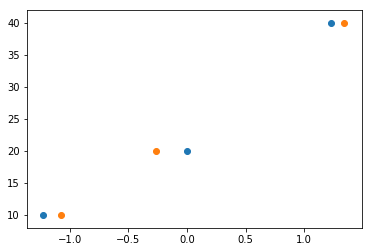

In [311]:
def normalize(X):
    sigma= np.std(X)
    mu = np.mean(X)
    return (X - mu) / sigma

test_X = normalize(test_X)

plt.scatter(test_X[0], test_y)
plt.scatter(test_X[1], test_y)

# Gradient Descent

### hypothesis function

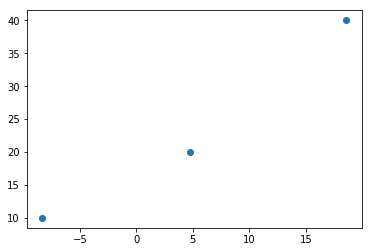

In [312]:
def hypothesis(theta, X):
    '''
    Define the hypothesis function, which is a simple linear function with n + 1 coefficients,
    where n is the number of features
    
    return the vector y_hat, the predicted values
    '''
    if not isinstance(X, pd.DataFrame):
        X = X.to_frame()
        
    # make a copy
    df = X.copy()
    
    # add extra column of ones 
    df.insert(0, 'y-intercept', 1)
    
    # multiply each row by theta, elementwise
    df = df.multiply(theta)
    
    # add all values per row
    predictions = df.sum(axis=1)
    
    return predictions

# predictions vs actual
plt.scatter(hypothesis(test_theta, test_X), test_y)

### cost function

In [313]:
def cost(theta, X, y):
    '''
    Define the cost function J for a linear function. 
    This tells you how good your hypothesized thetas estimate the line that best predicts y

    calculation:

       J = sum of squared differences between hypothesized values h(X) and actual values y,
           and the sum is then multiplied by (2 * m )**-1, where m is the sample size
    '''
    # sample size
    m = len(y)
    
    # diff
    difference = hypothesis(theta, X) - y

    # square
    squared = difference**2
    
    # sum
    summed = squared.sum()
    
    # coef
    return 1 / (2 * m) * summed

cost(test_theta, test_X, test_y)

171.2064599655476

### Gradient Descent

In [321]:
def gradientDescent(theta, iterations, alpha, X, y):
    '''
    Gradient descent is a function that loops through the derivative of the cost function, 
    and adjusts theta iteratively by the stepsize alpha to reduce the cost with each loop. 
    Eventually it arrives at a point where the cost cannot further be reduced. 
    
    inputs:
        theta: the theta vector at which to start the gradient descent

        iterations: number of steps the descent should take

        alpha: the size of each step

        X: the features of the dataset

        y: the target values
    
    returns: 
        theta: a vector of tuned coefs
        
        j_history: a vector of the cost calculated at each step 
    '''
    
    m = len(y)
    
    j_history = [] 
    
    if not isinstance(X, pd.DataFrame):
        X = X.to_frame()

    # copy X and add a column
    X_copy = X.copy()
    X_copy.insert(0, 'y-intercept', 1)
    
    for i in range(iterations):
        temp_theta = np.ones(len(theta))
        
        for t in range(len(theta)):
            # partial derivative in terms of theta_t
            derivative = (
                hypothesis(theta, X)\
                    .subtract(y)\
                    .multiply(X_copy.iloc[:,t])\
                    .sum(axis=0)\
                    * (1/m)
            )
            
            # take a step and calculate new theta_t
            temp_theta[t] = theta[t] - alpha * derivative
        
        
        # record cost at this step
        j_history.append((np.round_(temp_theta, 3), cost(temp_theta, X, y),))
        
        # copy new thetas to be used for next step
        theta = temp_theta.copy()
    
    return theta, j_history

gradientDescent(test_theta, 100, .1, test_X, test_y)

(array([23.33284637,  8.96433568,  3.50785561]),
 [(array([ 6.833, 10.127,  1.165]), 138.8849179839605),
  (array([ 8.483, 10.224,  1.302]), 112.76716438260496),
  (array([ 9.968, 10.299,  1.415]), 91.6515971908715),
  (array([11.305, 10.355,  1.509]), 74.57309212481806),
  (array([12.508, 10.396,  1.589]), 60.755153019074626),
  (array([13.59 , 10.425,  1.656]), 49.57219602270812),
  (array([14.565, 10.445,  1.714]), 40.51966990791911),
  (array([15.441, 10.457,  1.764]), 33.190284324698375),
  (array([16.231, 10.462,  1.808]), 27.25503164551054),
  (array([16.941, 10.463,  1.847]), 22.447992712274377),
  (array([17.58 , 10.46 ,  1.882]), 18.554143959125916),
  (array([18.155, 10.454,  1.914]), 15.39955477158585),
  (array([18.673, 10.446,  1.943]), 12.843494657318745),
  (array([19.139, 10.435,  1.97 ]), 10.772070469294942),
  (array([19.559, 10.423,  1.996]), 9.093092109841963),
  (array([19.936, 10.409,  2.02 ]), 7.731926321469956),
  (array([20.276, 10.395,  2.043]), 6.62814633887

### predicted vs actual

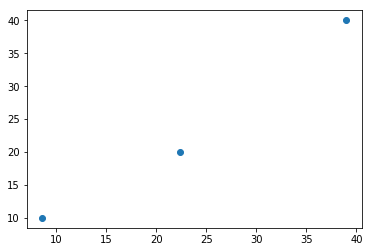

In [322]:
plt.scatter(
    hypothesis(
        gradientDescent(test_theta, 100, .1, test_X, test_y)[0], 
        test_X), 
    test_y)

### demo for single var

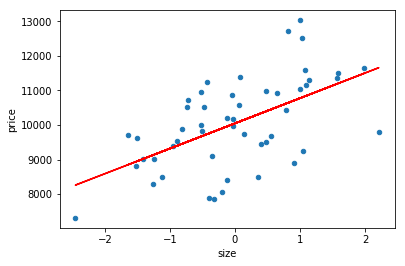

In [319]:
# generate data
data = pd.DataFrame({
    'size': np.random.normal(100, 10, 50)
})

data['price'] = data['size'].apply(lambda x: x * np.random.randint(80, 120))

# normalize x
data['size'] = normalize(data['size'])

# plot points
data.plot.scatter(x='size', y='price')

# compute theta
theta = gradientDescent([1,1], 100, .1, data['size'], data.price)[0]

# plot regression
plt.plot(
    data['size'],
    hypothesis(theta, data['size']),
    c='r'
)

### compare results to statsmodels

In [336]:
# my code
gradientDescent([22, 1e-10, 10], 1000, .001, test_X, test_y)[0]

array([22.84307277,  1.04402666, 11.08817573])

In [326]:
# https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

import statsmodels.api as sm

# Note the difference in argument order

model = sm.OLS(
    test_y, 
    sm.add_constant(test_X)
).fit()

# predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

/Users/nico/code/pydata-env/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  "samples were given." % int(n), ValueWarning)
/Users/nico/code/pydata-env/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1392: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - np.divide(self.nobs - self.k_constant, self.df_resid) * (1 - self.rsquared)
/Users/nico/code/pydata-env/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1392: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - np.divide(self.nobs - self.k_constant, self.df_resid) * (1 - self.rsquared)
/Users/nico/code/pydata-env/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1400: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/Users/nico/code/pydata-env/lib/python3.6/site-packages/statsmodels/regress

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                     0.000
Date:                Mon, 07 May 2018   Prob (F-statistic):                nan
Time:                        15:06:28   Log-Likelihood:                 96.870
No. Observations:                   3   AIC:                            -187.7
Df Residuals:                       0   BIC:                            -190.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.3333        inf          0        nan         nan         nan
0           1.332e-14        inf          0        nan         nan         nan
1             12.4722        inf          0        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.600
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.354
Skew:                          -0.382   Prob(JB):                        0.838
Kurtosis:                       1.500   Cond. No.                         10.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [327]:
# what is the cost of the statsmodels function?
cost([23.33, 1.3e-14, 12.47], test_X, test_y)

7.956429836395348e-06

---

---

## apply to the data from the exercise

In [337]:
houses = pd.read_csv('ex1data2.txt', names=['space', 'rooms', 'prices'])
houses.describe()

,space,rooms,prices
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


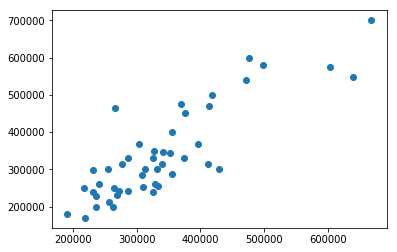

In [341]:
X = houses[['space', 'rooms']]
y = houses.prices

# normalize
X = normalize(X)

# apply gradient descent
# compare predicted to actual
plt.scatter(
    hypothesis(
        gradientDescent([1,1,1], 1000, .01, X, y)[0], 
        X), 
    y
)